# Global Power Plant (Evaluation Project - 4) -- Capacity_MW

### Problem Statement:

#### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#### Key attributes of the database

The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
 
`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014

`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

#### Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

#### Prediction :   Make two prediction  1) Fuel Type   2) capacity_mw 

#### To download the dataset, use the link given below :

https://github.com/SANJAY9068068086/Machine-Learning-DataSets/blob/23b1612a5792e7e894a41919cf0da66d7d81b908/database_IND.csv

## Prediction : 2 (capacity_mw)

In [1]:
# Let's import some necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Let's import the dataset first

database = pd.read_csv("database_IND.csv")
database.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

                     geolocation_source  wepp_id year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                   NaN   
1                                   WRI      NaN                   NaN   
2                                   WRI      NaN                   NaN   
3                                   WRI      NaN                2018.0   
4                                   WRI      NaN                2018.0   

  generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3          631.777928          617.789264             843.747   
4         1668.290000         3035.550000            5916.370   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           886.004428           663.774500  Central Electricity Authority   
4          6243.000000          5385.579736  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 25 columns]

In [3]:
# Let's check the value counts of each objects columns

for col in database.columns:
    if database[col].dtype=='object':
        print(database[col].value_counts())
        print()

IND    908
Name: country, dtype: int64

India    908
Name: country_long, dtype: int64

Dadri Solar Power Plant                   1
DADRI (NCTPP)                             1
HINGOLI MILL                              1
DUGGAVATHI MILL                           1
LTML Wind Energy Project in Tamil Nadu    1
                                         ..
KUTTALAM GT                               1
GIRI BATA                                 1
LAKWA GT                                  1
DAHANU FRESNEL                            1
MACHKUND                                  1
Name: name, Length: 908, dtype: int64

IND0000378    1
WRI1026663    1
IND0000536    1
IND0000217    1
IND0000214    1
             ..
WRI1026150    1
IND0000216    1
WRI1026340    1
WRI1019932    1
WRI1020017    1
Name: gppd_idnr, Length: 908, dtype: int64

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

Oil             

In [4]:
# Let's drop the columns which is not useful for prediction

database.drop(columns = ["country", "country_long", "name", "url", "gppd_idnr"], axis=1, inplace=True)

In [5]:
# Shape of the dataset

database.shape

(908, 20)

In [6]:
# Quick information about dataset

database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   capacity_mw               908 non-null    float64
 1   latitude                  862 non-null    float64
 2   longitude                 862 non-null    float64
 3   primary_fuel              908 non-null    object 
 4   other_fuel1               199 non-null    object 
 5   other_fuel2               1 non-null      object 
 6   other_fuel3               0 non-null      float64
 7   commissioning_year        528 non-null    float64
 8   owner                     342 non-null    object 
 9   source                    908 non-null    object 
 10  geolocation_source        889 non-null    object 
 11  wepp_id                   0 non-null      float64
 12  year_of_capacity_data     520 non-null    float64
 13  generation_gwh_2013       384 non-null    float64
 14  generation

In [7]:
# Let's check the missing values if any...

feature_database = database.isna().sum().keys().tolist()
missing_database = database.isna().sum().values.tolist()

missing_data = pd.DataFrame(list(zip(feature_database, missing_database)),columns= ["Columns", "Missing Values"])
missing_data["Missing %"] = round(((missing_data["Missing Values"]/database.shape[0])*100),2)

missing_data

Columns  Missing Values  Missing %
0                capacity_mw               0       0.00
1                   latitude              46       5.07
2                  longitude              46       5.07
3               primary_fuel               0       0.00
4                other_fuel1             709      78.08
5                other_fuel2             907      99.89
6                other_fuel3             908     100.00
7         commissioning_year             380      41.85
8                      owner             566      62.33
9                     source               0       0.00
10        geolocation_source              19       2.09
11                   wepp_id             908     100.00
12     year_of_capacity_data             388      42.73
13       generation_gwh_2013             524      57.71
14       generation_gwh_2014             507      55.84
15       generation_gwh_2015             483      53.19
16       generation_gwh_2016             471      51.87
17       generation_gwh_2017             465      51.21
18    generation_data_source             458      50.44
19  estimated_generation_gwh             908     100.00

Most of the data missed in this dataset.

In [8]:
# let's drop the columns which has missed values more than 60%

for column in database:
    if database[column].isnull().sum()*100.0/database.shape[0]>60:
        database.drop(column,axis=1, inplace=True)

In [9]:
# Let's again check the missing value percentage

feature_database = database.isna().sum().keys().tolist()
missing_database = database.isna().sum().values.tolist()

missing_data = pd.DataFrame(list(zip(feature_database, missing_database)),columns= ["Columns", "Missing Values"])
missing_data["Missing %"] = round(((missing_data["Missing Values"]/database.shape[0])*100),2)

missing_data

Columns  Missing Values  Missing %
0              capacity_mw               0       0.00
1                 latitude              46       5.07
2                longitude              46       5.07
3             primary_fuel               0       0.00
4       commissioning_year             380      41.85
5                   source               0       0.00
6       geolocation_source              19       2.09
7    year_of_capacity_data             388      42.73
8      generation_gwh_2013             524      57.71
9      generation_gwh_2014             507      55.84
10     generation_gwh_2015             483      53.19
11     generation_gwh_2016             471      51.87
12     generation_gwh_2017             465      51.21
13  generation_data_source             458      50.44

In [10]:
# Let's check the rows with pending NA

index = database.index[database.isnull().any(axis=1)]
index

Int64Index([  0,   1,   2,  13,  14,  17,  18,  19,  20,  21,
            ...
            897, 898, 899, 901, 902, 903, 904, 905, 906, 907],
           dtype='int64', length=536)

In [11]:
# Let's drop the NA rows

database.drop(index,axis=0, inplace=True)

In [12]:
# Shape after darping the Null indexes

database.shape

(372, 14)

In [13]:
# Let's check the null values if any present...

database.isnull().sum()

capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

All null values has been fixed..

In [14]:
# capacity_mw vs primary_fuel

sns.barplot(y="capacity_mw", x="primary_fuel", data=database)

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

In [15]:
# Let's check correlation matrix

corr = database.corr()
corr

capacity_mw  latitude  longitude  commissioning_year  \
capacity_mw               1.000000  0.050769  -0.005012            0.305064   
latitude                  0.050769  1.000000   0.112982            0.150375   
longitude                -0.005012  0.112982   1.000000            0.073477   
commissioning_year        0.305064  0.150375   0.073477            1.000000   
year_of_capacity_data          NaN       NaN        NaN                 NaN   
generation_gwh_2013       0.821786  0.041508   0.013826            0.144851   
generation_gwh_2014       0.878885  0.049358   0.021218            0.193889   
generation_gwh_2015       0.894430  0.048371   0.038075            0.221538   
generation_gwh_2016       0.910223  0.052206   0.061021            0.234854   
generation_gwh_2017       0.914655  0.068727   0.074431            0.238397   

                       year_of_capacity_data  generation_gwh_2013  \
capacity_mw                              NaN             0.821786   
latitude                                 NaN             0.041508   
longitude                                NaN             0.013826   
commissioning_year                       NaN             0.144851   
year_of_capacity_data                    NaN                  NaN   
generation_gwh_2013                      NaN             1.000000   
generation_gwh_2014                      NaN             0.968570   
generation_gwh_2015                      NaN             0.907428   
generation_gwh_2016                      NaN             0.893650   
generation_gwh_2017                      NaN             0.858698   

                       generation_gwh_2014  generation_gwh_2015  \
capacity_mw                       0.878885             0.894430   
latitude                          0.049358             0.048371   
longitude                         0.021218             0.038075   
commissioning_year                0.193889             0.221538   
year_of_capacity_data                  NaN                  NaN   
generation_gwh_2013               0.968570             0.907428   
generation_gwh_2014               1.000000             0.970904   
generation_gwh_2015               0.970904             1.000000   
generation_gwh_2016               0.956394             0.982378   
generation_gwh_2017               0.930506             0.958673   

                       generation_gwh_2016  generation_gwh_2017  
capacity_mw                       0.910223             0.914655  
latitude                          0.052206             0.068727  
longitude                         0.061021             0.074431  
commissioning_year                0.234854             0.238397  
year_of_capacity_data                  NaN                  NaN  
generation_gwh_2013               0.893650             0.858698  
generation_gwh_2014               0.956394             0.930506  
generation_gwh_2015               0.982378             0.958673  
generation_gwh_2016               1.000000             0.979362  
generation_gwh_2017               0.979362             1.000000

In [16]:
# Let's drop the column which has all NaN value

database.drop(columns = ["year_of_capacity_data"], axis=1, inplace=True)

# Let's drop the must collerated features

database.drop(columns = ["generation_gwh_2014", "generation_gwh_2015","generation_gwh_2016"], axis=1, inplace=True)

<AxesSubplot:>

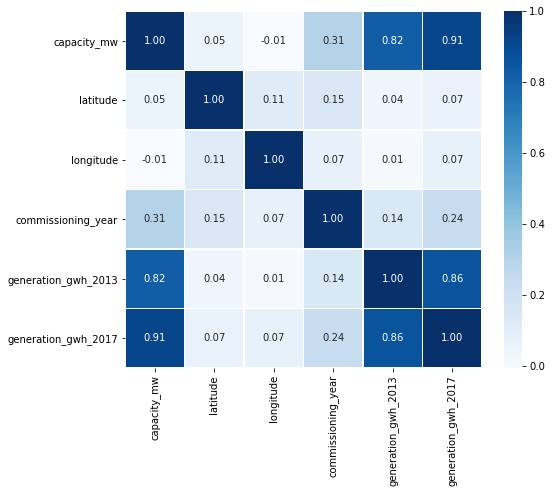

In [17]:
# Let's visualize with heatmap

cor = database.corr()

plt.figure(figsize = (8,8))
sns.heatmap(cor, cbar=True, annot=True, cbar_kws={"shrink":.82}, annot_kws={"size":10},fmt=".2f",
            linewidth = .2,square=True, cmap="Blues")

Now the data look better than before...

In [18]:
# Let's check the "0" value counts if any...

for column in database:
    print(column+" = "+str(database[database[column]==0].shape[0]))

capacity_mw = 0
latitude = 0
longitude = 0
primary_fuel = 0
commissioning_year = 0
source = 0
geolocation_source = 0
generation_gwh_2013 = 15
generation_gwh_2017 = 21
generation_data_source = 0


Some column have minimum 0 values. So, it's not big deal & 0 value play own role in the dataset

In [19]:
# Let's check the skewness

database.skew()

capacity_mw            2.423485
latitude              -0.188749
longitude              0.898146
commissioning_year    -0.998011
generation_gwh_2013    3.368188
generation_gwh_2017    3.542102
dtype: float64

capacity_mw is our target column.

In [20]:
# Let's use the zscore technique to remove the skewness

features = ["longitude","capacity_mw","commissioning_year","generation_gwh_2013","generation_gwh_2017"]

from scipy.stats import zscore

z = np.abs(zscore(database[features]))
database = database[(z<3).all(axis=1)]

In [21]:
# Let's check the skewness again

database.skew()

capacity_mw            1.363687
latitude              -0.172358
longitude              0.872597
commissioning_year    -0.807819
generation_gwh_2013    1.993856
generation_gwh_2017    1.851761
dtype: float64

skewness is still pending. So, let's separate the input and output and then apply the another technique

In [22]:
# Let' separate the input and output

df_x = database.drop(columns = ["capacity_mw"], axis=1)
df_y = database["capacity_mw"]

In [23]:
# Removing the skewness

for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index] = np.log1p(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index] = np.square(df_x[index])

In [24]:
# Let's check the skewness again

df_x.skew()

latitude              -0.172358
longitude              0.713469
commissioning_year    -0.794950
generation_gwh_2013   -0.167668
generation_gwh_2017   -0.138324
dtype: float64

Now the skewness is looking good than before. Let's use one hot encoding technique to convert the categorical columns to numerical columns

In [25]:
# Converting categorical columns to numerical column

df_x = pd.get_dummies(df_x, drop_first=True)

df_x

latitude  longitude  commissioning_year  generation_gwh_2013  \
3     23.8712   4.525696           4016016.0            41.604042   
4     21.9603   4.423757           4060225.0            55.058680   
5     23.7689   4.243407           4020025.0            45.060485   
6     10.4547   4.356809           3880900.0            25.010459   
7     32.2258   4.359359           4040100.0            42.874272   
..        ...        ...                 ...                  ...   
883   30.5669   4.388838           4024036.0            36.957530   
890   22.8725   4.308902           3944196.0            70.919119   
891   20.2727   4.381767           4040100.0            60.000619   
894   30.3033   4.363970           3964081.0            28.333137   
900   30.1081   4.360876           4028049.0            64.931620   

     generation_gwh_2017  primary_fuel_Gas  primary_fuel_Hydro  \
3              42.242823                 1                   0   
4              73.816723                 0                   0   
5              49.654171                 0                   0   
6              20.311074                 0                   1   
7              42.549103                 0                   1   
..                   ...               ...                 ...   
883            58.886171                 0                   1   
890            78.435944                 0                   0   
891            47.719431                 0                   0   
894            26.784701                 0                   1   
900            64.921606                 0                   0   

     primary_fuel_Nuclear  primary_fuel_Oil  
3                       0                 0  
4                       0                 0  
5                       0                 0  
6                       0                 0  
7                       0                 0  
..                    ...               ...  
883                     0                 0  
890                     0                 0  
891                     0                 0  
894                     0                 0  
900                     0                 0  

[354 rows x 9 columns]

In [26]:
# Shape of final dataset

df_x.shape

(354, 9)

In [27]:
# Let's do the scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_x)

In [28]:
# Let's import some necessary libraries for model building

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from time import time

In [29]:
# Let's find the best random state

def bestmodel(model):
    best_score = 0
    best_state = 0
    start = time()
    for i in range(1,201):
        x_train, x_test, y_train, y_test = train_test_split(x_scaled, df_y, test_size = 0.25, random_state = i)
        model.fit(x_train, y_train)
        y_pre = model.predict(x_test)
        score = r2_score(y_test, y_pre)
        if score > best_score:
            best_score = score
            best_state = i
    print("Best Random State is      : ",best_state)
    print("Best R2_Score is          :  ",best_score)
    print("Cross Validation Score is : ",cross_val_score(model, x_scaled, df_y, cv=5, scoring='r2').mean())
    end = time()
    print("Time taken by model for prediction is : {:.4f} seconds".format(end-start))

In [30]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
bestmodel(DTR)

Best Random State is      :  7
Best R2_Score is          :   0.773048426684241
Cross Validation Score is :  0.5839132444430032
Time taken by model for prediction is : 0.9497 seconds


In [31]:
# Format for models

def bestmod(mod):
    start = time()
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, df_y, test_size = 0.25, random_state = 7)
    mod.fit(x_train, y_train)
    y_pred = mod.predict(x_test)
    score = r2_score(y_test, y_pred)
    print("Best R2_Score is : ",score)
    print("Cross Validation Score is : ",cross_val_score(mod, x_scaled, df_y, cv=5, scoring='r2').mean())
    end = time()
    print("Time taken by model for prediction is : {:.4f} seconds".format(end-start))

In [32]:
# K-Neighbors Regressor

from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor()
bestmod(KNR)

Best R2_Score is :  0.7068666098025072
Cross Validation Score is :  0.6450410321291754
Time taken by model for prediction is : 0.0490 seconds


In [33]:
# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
bestmod(GBR)

Best R2_Score is :  0.7476125928278857
Cross Validation Score is :  0.7414496132586305
Time taken by model for prediction is : 0.6580 seconds


In [34]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
bestmod(RFR)

Best R2_Score is :  0.7978401256560163
Cross Validation Score is :  0.7782971812292094
Time taken by model for prediction is : 2.6097 seconds


#### After analyzing the scores and cross validation scores of 4 model, Random Forest Regressor is giving the best score. Let's try to improve the score using hyperparameter tuning.

In [39]:
# Final Model with HyperParameter Tuning

x_train, x_test, y_train, y_test = train_test_split(x_scaled, df_y, test_size = 0.25, random_state = 174)
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[100,200], "min_samples_split":[2,3],
             "min_samples_leaf":[1,2],"criterion":["mse", "mae"]}


grid_search = GridSearchCV(RFR, param_grid)
grid_search.fit(x_train, y_train)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, df_y, test_size = 0.25, random_state = 7)
Final_Reg_Model = RandomForestRegressor(n_estimators=100, criterion="mse", min_samples_split=2,min_samples_leaf=1)
Final_Reg_Model.fit(x_train, y_train)
y_preds = Final_Reg_Model.predict(x_test)
r2_score(y_test, y_preds)

0.8043389818917933

In [40]:
# Saving the Final Model

import joblib

joblib.dump(Final_Reg_Model, "Final_Capacity_Model.pkl")

['Final_Capacity_Model.pkl']